Пространственная автокорреляция основана на том, что существует связь между значениями близко расположенных наблюдениями.

То есть пространственная автокорреляция связывает значение переменной со значениями той же переменной, но уже в другой точке пространства. 

Пространственная автокорреляция может быть ***положительной и отрицательной***. При положительной пространственной автокорреляции близкие значения располагаются рядом друг с другом, тогда как значительно отличающиеся разбросаны на большое расстояние.

В случае отрицательной пространственной автокорреляции близкие значения рассматриваемой переменной расположены на удалении друг от друга.

**Глобальная** пространственная автокорреляция рассматривает общие тенденции, в то время как **локальная** автокорреляция концентрируется на отклонении от общих трендов.

In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 79.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.7/243.7 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [6]:
pip install splot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 5.5 MB/s eta 0:00:00


In [8]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Глобальная пространственная автокорреляция

In [11]:
# Graphics
import matplotlib.pyplot as plt
import seaborn as sn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily as cx

# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

/usr/local/lib/python3.9/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/splot/_viz_esda_mpl.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest

In [16]:
mo = gpd.read_file("https://raw.githubusercontent.com/baltti/python-spatial-itmo/main/datasets/mo.geojson")

mo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        110 non-null    object  
 1   ADMIN_L5    110 non-null    object  
 2   population  110 non-null    int64   
 3   area_km2    110 non-null    float64 
 4   geometry    110 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 4.4+ KB


In [23]:
mo = mo.to_crs(3857)

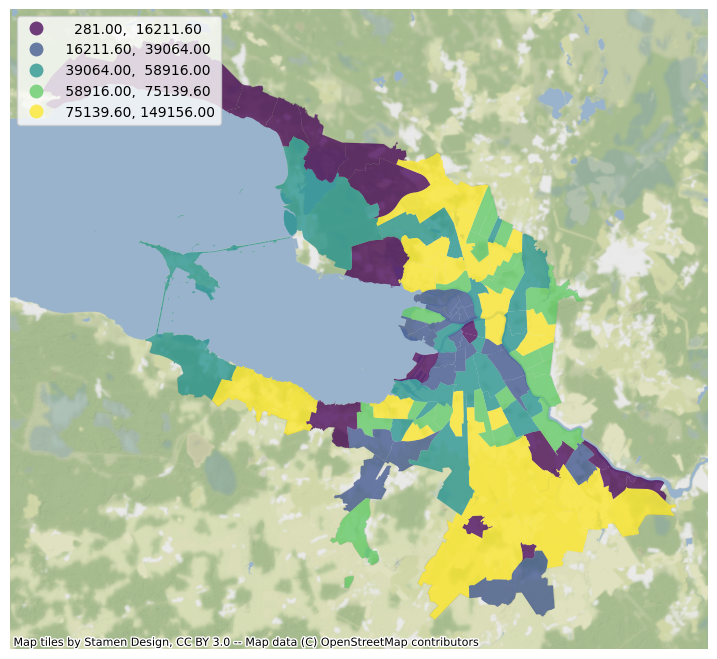

In [25]:
f, ax = plt.subplots(1, figsize=(9, 9))
mo.plot(
    column="population",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds={"loc": 2},
    ax=ax,
)
cx.add_basemap(
    ax,
    crs=mo.crs,
    source=cx.providers.Stamen.TerrainBackground,
)
ax.set_axis_off()

In [26]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(mo, k=8)
# Row-standardization
w.transform = "R"

In [46]:
mo["population_lag"] = weights.lag_spatial(w, mo["population"])

In [47]:
mo.loc[[0, 1], ["population", "population_lag"]]

,population,population_lag
0,1380,56948.625
1,2807,54237.125


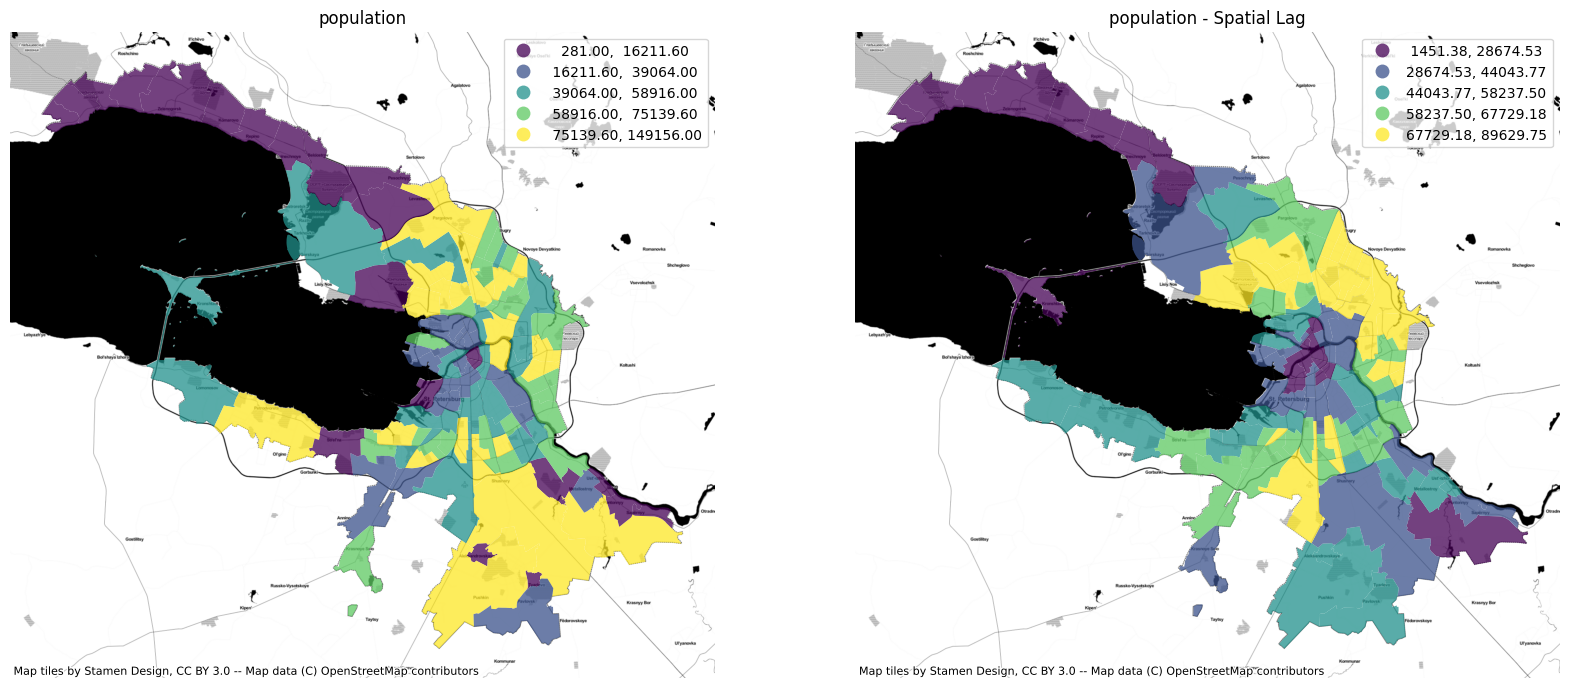

In [55]:
f, axs = plt.subplots(1, 2, figsize=(20, 10))
ax1, ax2 = axs

mo.plot(
    column="population",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("population")
cx.add_basemap(
    ax1,
    crs=mo.crs,
    source=cx.providers.Stamen.Toner,
)

mo.plot(
    column="population_lag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("population - Spatial Lag")
cx.add_basemap(
    ax2,
    crs=mo.crs,
    source=cx.providers.Stamen.Toner,
)

plt.show()

In [31]:
mo["population_std"] = mo["population"] - mo["population"].mean()
mo["population_lag_std"] = weights.lag_spatial(w, mo["population_std"])

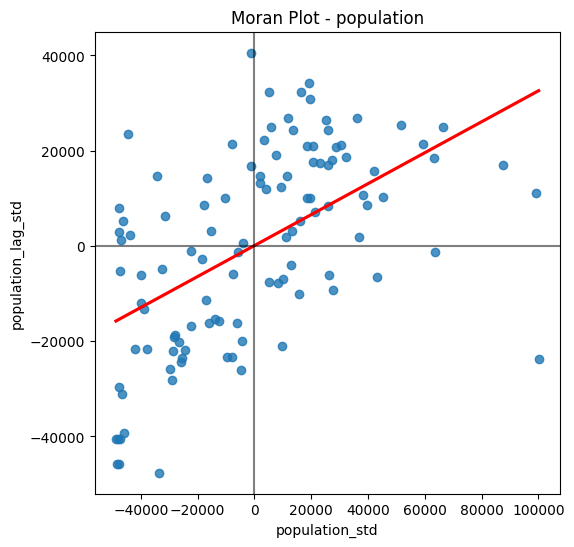

In [56]:
f, ax = plt.subplots(1, figsize=(6, 6))
sn.regplot(
    x="population_std",
    y="population_lag_std",
    ci=None,
    data=mo,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - population")
plt.show()

In [33]:
w.transform = "R"
moran = esda.moran.Moran(mo["population"], w)

In [34]:
moran.I

0.32487426499991623

(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.32', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.32)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

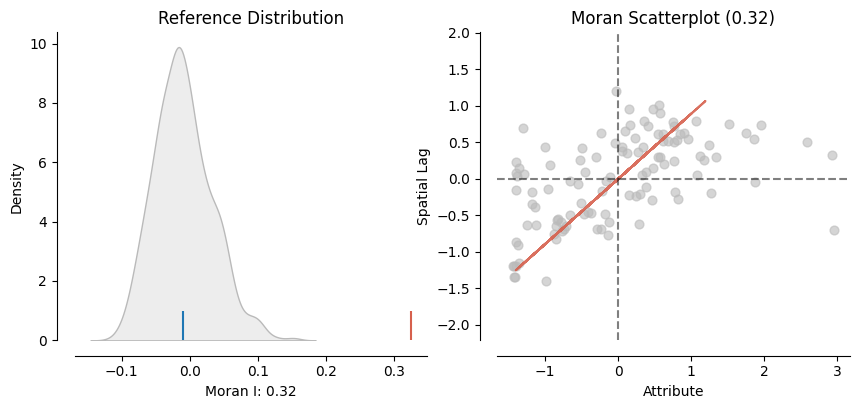

In [36]:
plot_moran(moran)

# Локальная пространственная автокорреляция

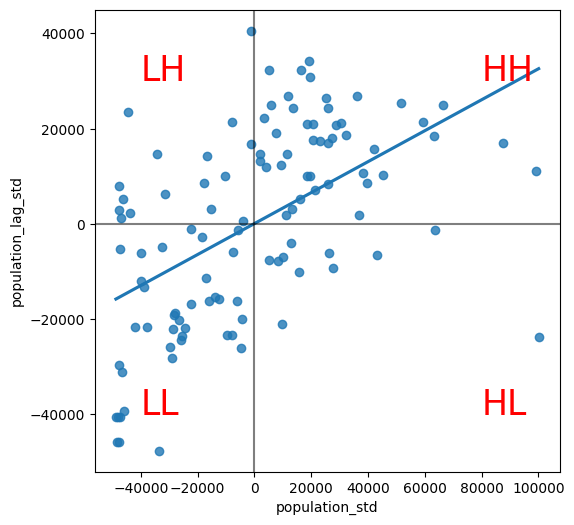

In [39]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
sn.regplot(
    x="population_std", y="population_lag_std", data=mo, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# Add text labels for each quadrant
plt.text(80000, 30000, "HH", fontsize=25, c="r")
plt.text(80000, -40000, "HL", fontsize=25, c="r")
plt.text(-40000, 30000, "LH", fontsize=25, c="r")
plt.text(-40000, -40000, "LL", fontsize=25, c="r")
# Display
plt.show()

In [43]:
lisa = esda.moran.Moran_Local(mo["population"], w)

In [40]:
pip install splot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from splot import esda as esdaplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

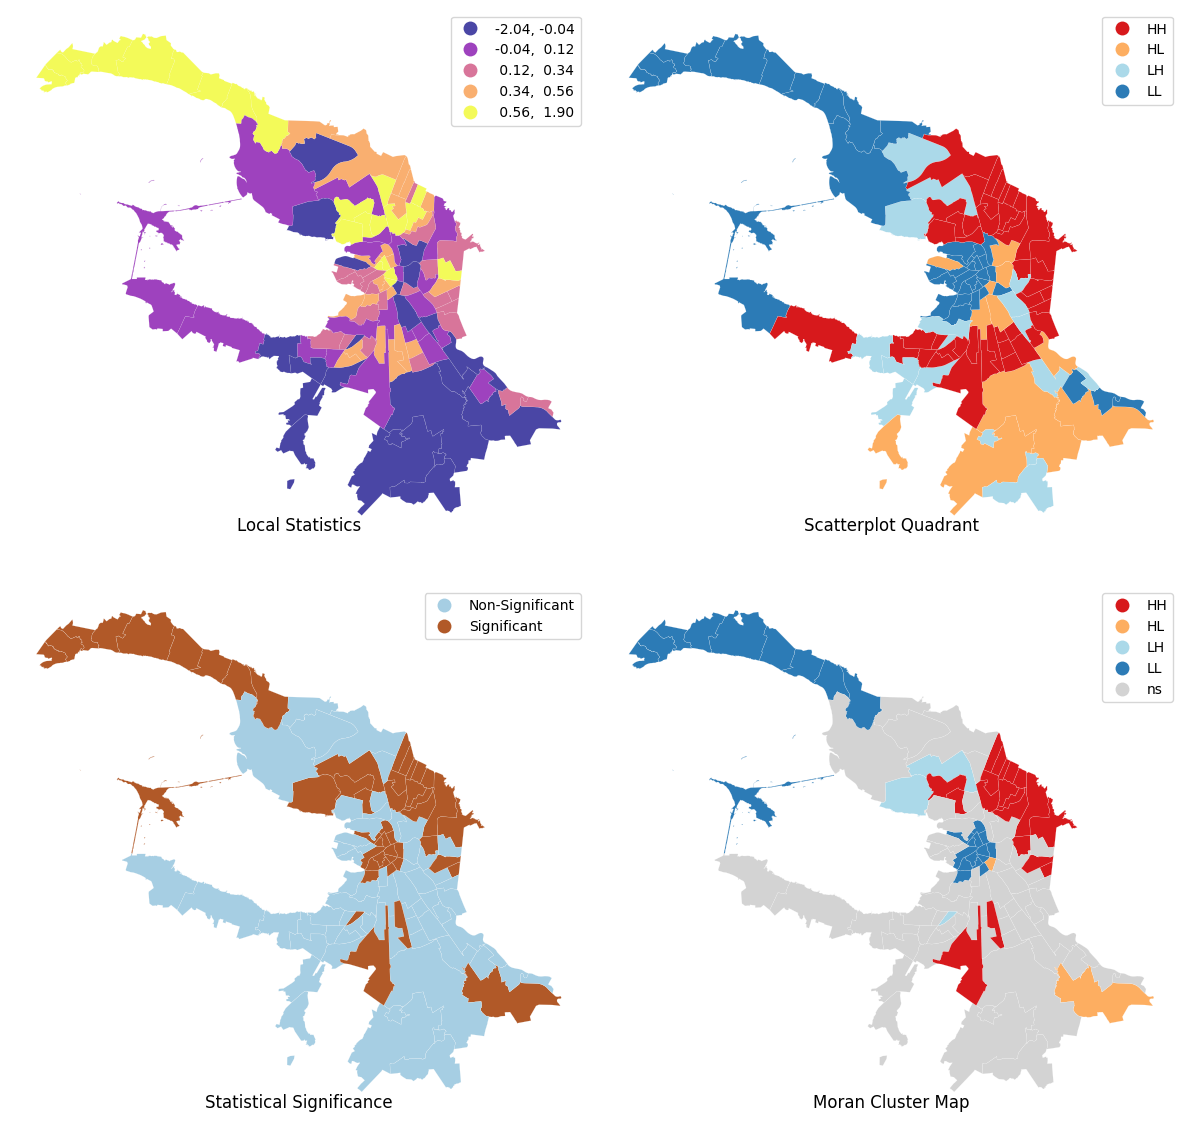

In [53]:
%matplotlib inline
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
mo.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, mo, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=mo.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
mo.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, mo, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()